In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import datetime

In [16]:
initialData=pd.read_csv("births.csv")

In [17]:
initialData.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [18]:
initialData.describe(include="all")

,year,month,day,gender,births
count,15547.000000,15547.000000,15067.000000,15547,15547.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7776,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561
std,6.728340,3.449632,15.284034,NaN,28552.465810
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000


In [19]:
#remove rows containing missing values
initialData.dropna(inplace=True)

#remove rows with no day or absurd day number
initialData.drop(initialData[(initialData.day <1) | (initialData.day >31)].index, inplace=True)

In [20]:
initialData.describe(include="all")
#min-max values show that all years such as 1960<=y<=1989, all months such as 1<=m<=12 and all days such as 1<=d<=31
#we can also see that genders have only two possible values

,year,month,day,gender,births
count,14717.000000,14717.000000,14717.000000,14717,14717.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7360,NaN
mean,1978.463070,6.517361,15.838078,NaN,4789.463749
std,5.768439,3.449543,8.859636,NaN,708.016776
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1973.000000,4.000000,8.000000,NaN,4374.000000
50%,1978.000000,7.000000,16.000000,NaN,4807.000000
75%,1983.000000,10.000000,23.000000,NaN,5256.000000


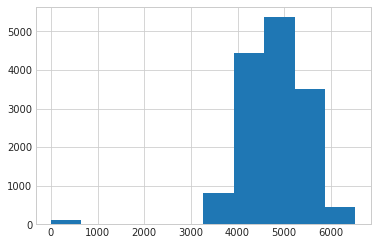

In [22]:
plot=plt.hist(initialData.births)

In [8]:
#remove rows with extrem births figures (<2000 according to histogram)
initialData.drop(initialData[(initialData.births <2000)].index, inplace=True)

#remove duplicates year_month_day_gender if any
initialData.drop_duplicates(["year","month","day","gender"],inplace=True)

In [9]:
#aggregate both genders births
gb=initialData.groupby(["year","month","day"],as_index=False)
aggregatedData=gb.sum()

#check consistence
aggregatedData.describe(include="all")

,year,month,day,births
count,7305.000000,7305.000000,7305.000000,7305.000000
mean,1978.501027,6.522930,15.729637,9648.940178
std,5.766735,3.448939,8.800694,1127.315229
min,1969.000000,1.000000,1.000000,6675.000000
25%,1974.000000,4.000000,8.000000,8792.000000
50%,1979.000000,7.000000,16.000000,9622.000000
75%,1984.000000,10.000000,23.000000,10510.000000
max,1988.000000,12.000000,31.000000,12851.000000


In [10]:
#add dayname
aggregatedData["datetime"]=pd.to_datetime(aggregatedData.iloc[:,:3])
aggregatedData["dayname"]=aggregatedData["datetime"].apply(lambda x: x.day_name())

#add decade
aggregatedData["decade"]=aggregatedData.year.apply(lambda x: int(str(x)[2]+"0"))

#get rid of year, month, day columns
aggregatedData.drop(columns=["year","month","day"],inplace=True)

In [11]:
#aggregate births for same (dayname,decade)
gb2=aggregatedData.groupby(["decade","dayname"],as_index=False)
aggregatedData=gb2.sum()

#check consistence
aggregatedData

,decade,dayname,births
0,60,Friday,531220
1,60,Monday,526638
2,60,Saturday,483710
3,60,Sunday,451604
4,60,Thursday,517742
5,60,Tuesday,549754
6,60,Wednesday,537910
7,70,Friday,4992508
8,70,Monday,4895418
9,70,Saturday,4392927


In [12]:
#split into on df per decade
df60=aggregatedData.iloc[:7,1:]
df70=aggregatedData.iloc[7:14,1:]
df80=aggregatedData.iloc[14:,1:]

In [13]:
dayname_sorted=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

#normalize birth frequence to allow for between decades comparison and sort rows in the normal weekday order
def normalizeAndSort(df):
    df.births=df.births/sum(df.births)
    df.set_index("dayname",inplace=True)
    return df.reindex(dayname_sorted)
    
df60=normalizeAndSort(df60)
df70=normalizeAndSort(df70)
df80=normalizeAndSort(df80)

/home/ec2-user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


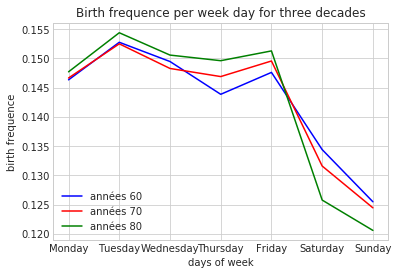

In [14]:
fig = plt.figure()

plt.plot(df60, color='blue', linestyle='solid', label='années 60')
plt.plot(df70, color='red', linestyle='solid', label='années 70')
plt.plot(df80, color='green', linestyle='solid', label='années 80')
plt.legend(loc='lower left');

plt.title("Birth frequence per week day for three decades")

ax = plt.axes()
ax = ax.set(xlabel='days of week', ylabel='birth frequence')